In [1]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.5 MB/s eta 0:00:00


https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

In [2]:
! pip show mtcnn

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: keras, opencv-python
Required-by: 


# Face Detection With Deep Learning

A number of deep learning methods have been developed and demonstrated for face detection.

Perhaps one of the more popular approaches is called the “Multi-Task Cascaded Convolutional Neural Network,” or MTCNN for short, described by Kaipeng Zhang, et al. in the 2016 paper titled “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”

The MTCNN is popular because it achieved then state-of-the-art results on a range of benchmark datasets, and because it is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.

The model is called a multi-task network because each of the three models in the cascade (P-Net, R-Net and O-Net) are trained on three tasks, e.g. make three types of predictions; they are: face classification, bounding box regression, and facial landmark localization.

The three models are not connected directly; instead, outputs of the previous stage are fed as input to the next stage. This allows additional processing to be performed between stages; for example, non-maximum suppression (NMS) is used to filter the candidate bounding boxes proposed by the first-stage P-Net prior to providing them to the second stage R-Net model.

In [3]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

Mounted at /content/drive


In [4]:

# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

In [5]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
 # load the image
 data = pyplot.imread(filename)
 # plot the image
 pyplot.imshow(data)
 # get the context for drawing boxes
 ax = pyplot.gca()
 # plot each box
 for result in result_list:
  # get coordinates
  x, y, width, height = result['box']
  # create the shape
  rect = Rectangle((x, y), width, height, fill=False, color='red')
  # draw the box
  ax.add_patch(rect)
 # show the plot
 pyplot.show()

In [14]:
from google.colab import files
uploaded = files.upload()


4/4 [==============================] - 0s 53ms/step


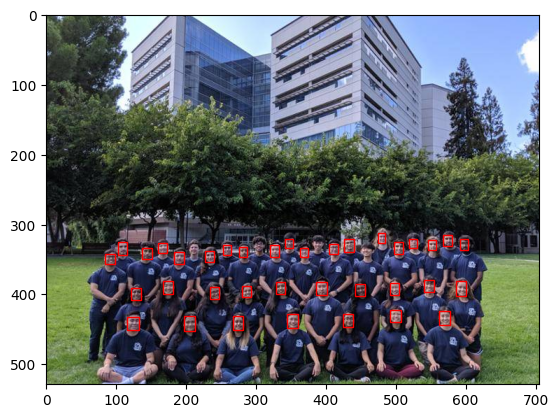

In [13]:
filename = 'SJSUOfficers2019.jpg'
#filename = "SJSU_Project_Expo.jpg"
#filename = 'cmpe-department1.jpg'
# load image from file

pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

The minimum box size for detecting a face can be specified via the ‘min_face_size‘ argument, which defaults to 20 pixels. The constructor also provides a ‘scale_factor‘ argument to specify the scale factor for the input image, which defaults to 0.709.

Once the model is configured and loaded, it can be used directly to detect faces in photographs by calling the detect_faces() function.

This returns a list of dict object, each providing a number of keys for the details of each face detected, including:


*   ‘box‘: Providing the x, y of the bottom left of the bounding box, as well as the width and height of the box.
*   ‘confidence‘: The probability confidence of the prediction.

*   ‘keypoints‘: Providing a dict with dots for the ‘left_eye‘, ‘right_eye‘, ‘nose‘, ‘mouth_left‘, and ‘mouth_right‘.
*   



For example, we can perform face detection on the college students photograph as follows: